# <center>CSC 723 Final Project</center>
Project Code 1: Naive Bayes

&emsp; Version 3.0<br> 
&emsp; March 2023

&emsp; CSC 723<br>
&emsp; Machine Learning for Cyber Security<br>
&emsp; Dakota State University

Robert Chavez<br>
Kiera Conway

--------

## Import Data
### Libraries

In [1]:
import numpy as np   # array mathematical operations library
import pandas as pd  # data analysis library3

### Data Set

In [2]:
# Set File Path
file_path = '/kaggle/input/spam-or-ham/SMSCollection.csv'

# Obtain Data from File Path
sms_data = pd.read_csv(file_path)

## Review Dataset
### Dataset Information

In [3]:
# General Information
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Check for null values
sms_data.isnull().sum()

Class    0
sms      0
dtype: int64

In [5]:
# View first and last 5 Observations
sms_data

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# View Example Message
print(sms_data.Class[42])      # view variable 2 (message) of 72nd message
print(sms_data.sms[42])      # view variable 1 (spam/ham) of 72nd message

spam
07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow


In [7]:
# Statistical Information
sms_data.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Analyze Information

#### .describe() Key

| Title  | Definition                                 | 
| ------ | --------                                   |
| Count  | Count/Occurences of each feature           | 
| Unique | The number of possible unique observations |
| Top    | The most frequent value                    | 
| Freq   | The frequency of the top value             | 

#### Data Analysis

The features of this dataset are 'Class' and 'sms', where 'Class' indicates whether the message is `spam` or a valid sms message, `ham` and 'sms' contains the corresponding message.

The count values above shows us there are 5572 non-null data enteries in each feature. As each feature contains the same count value, we can conclude there are no missing data points that we need to trim. 

The unique value of 2 under the Class feature verifies all messages are either `spam` or `ham`, and contain no erroneous values. Since the sms feature contains a unique value of 5169, which is less than 5572, we can assume that some messages are identical.

The top and freq values under Class show us that most messages are categorized as `ham`, with 4825 occurences. We can therefore determine there are 747 remaining messages categorized as `spam`. The top and freq values under sms confirm the previous hypothesis that some messages are identical; we can see that the most frequent message, occuring 30 times, contains the text "Sorry, I'll call later"

Using this information, we can identify the format of our data, determine its completeness, and verify the values contained are expected.

## Modify Data
### Create Column: Numerical Representation for Spam/Ham

In [8]:
# View first 5 Observations
print("Before Modification:\n") 
sms_data.head()

Before Modification:



,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Create New Column
sms_data['Class_num'] = sms_data.Class.map({'ham':0, 'spam':1})   # Ham becomes 0, Spam becomes 1

# View first 5 Observations
print("After Modification:\n") 
sms_data.head()

After Modification:



,Class,sms,Class_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Create Column: Message Lengths

In [10]:
# View first 5 Observations
print("Before Modification:\n") 
sms_data.head()

Before Modification:



,Class,sms,Class_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
# Create New Column
sms_data['sms_len'] = sms_data.sms.apply(len)   #apply length counter to each tweet 

# View first 5 Observations
print("After Modification:\n") 
sms_data.head()

After Modification:



,Class,sms,Class_num,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


## Graph Data

Text(0.5, 0, 'Message Length')

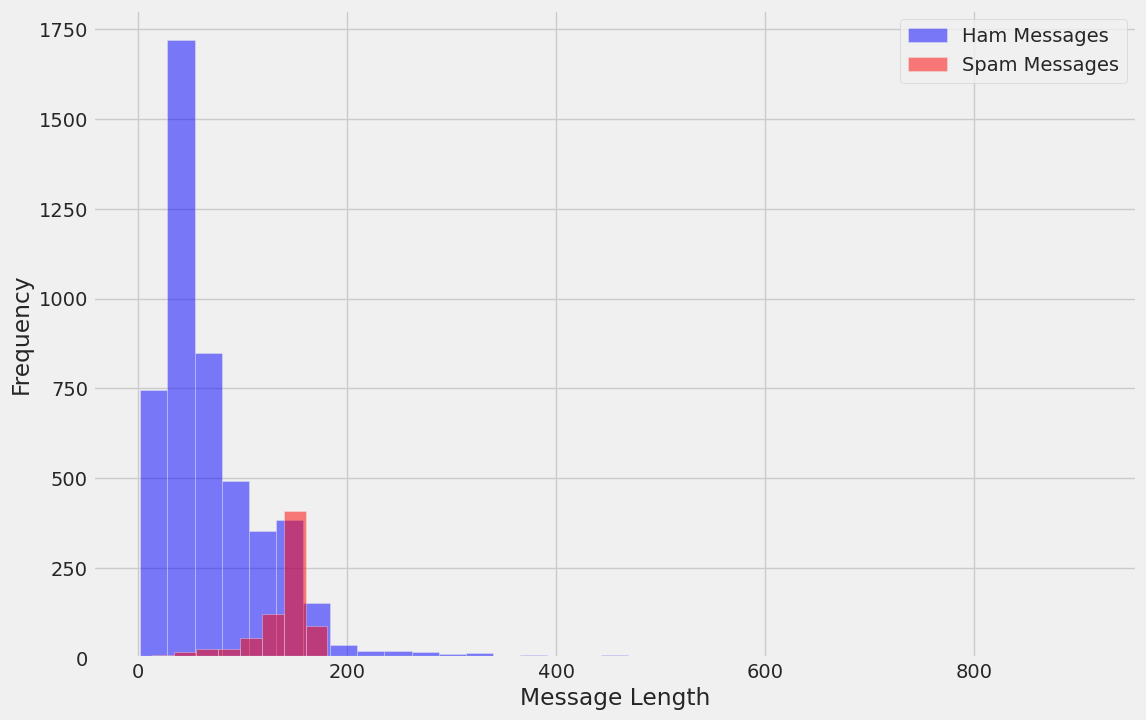

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns              #statistical data visualization

sns.set_style('whitegrid')          #set visual style
plt.style.use('fivethirtyeight')   #set plot visual style
plt.figure(figsize=(12,8))         #set plot size

# Plot Ham/ Spam Message Length as Histogram
sms_data[sms_data.Class=='ham'].sms_len.plot(bins=35, kind='hist', color='blue', label='Ham Messages', alpha=0.5)
sms_data[sms_data.Class=='spam'].sms_len.plot(kind='hist', color='red', label='Spam Messages', alpha=0.5)

plt.legend()
plt.xlabel("Message Length")

## Analyze Data
### Complete Data Set

In [13]:
sms_data.describe()

,Class_num,sms_len
count,5572.000000,5572.000000
mean,0.134063,80.489950
std,0.340751,59.942907
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,62.000000
75%,0.000000,122.000000
max,1.000000,910.000000


#### Analysis


* Data set includes Ham (0) and Spam (1) combined into Class_num
* A Class_num mean of 0.134 means that 13.4% of data is spam
    * Inversely, 86.6% is Ham
* SMS messages average 80.48 characters
* The shortest message length is 2 characters
* The longest message length is 910 characters


### Ham Data Set

In [14]:
# Analyze data labeled 'ham'
sms_data[sms_data.Class=='ham'].describe()

,Class_num,sms_len
count,4825.0,4825.000000
mean,0.0,71.482487
std,0.0,58.440652
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,93.000000
max,0.0,910.000000


#### Analysis


* This data set includes Ham (0) only
* There are 4,825 ham messages
* Remember, ham is 0, so all other stats in Class_num will == 0
* Ham messages average 71.48 characters
* The shortest ham message length is 2 characters
* The longest ham message length is 910 characters

### Spam Data Set

In [15]:
# Analyze data labeled 'spam'
sms_data[sms_data.Class=='spam'].describe()

,Class_num,sms_len
count,747.0,747.000000
mean,1.0,138.670683
std,0.0,28.873603
min,1.0,13.000000
25%,1.0,133.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,223.000000


#### Analysis


* This data set includes Spam (1) only
* There are 747 spam messages
* Remember, spam is 1, so all other stats in Class_num will == 1
    * except standard deviation, as there is no deviation between 1 and 1
* Spam messages average 138.67 characters
* The shortest spam message length is 13 characters
* The longest spam message length is 223 characters

## Prepare Data using Natural Language Processing
### Create Function to Clean up Messages

In [16]:
import string
from nltk.corpus import stopwords

# List of common abbreviations
abrv = ['rofl', 'stfu', 'icymi', 'tldr', 'ok', 'tmi', 'afaik', 'lmk', 'nvm', 'ftw', 'byob', 'rt', 'bogo', 'jk', 'jw', 'im', 'pm', 'ig', 'tgif', 'bh', 'tbf', 'rn', 'fubar', 'brb', 'iso', 'brt', 'btw', 'ftfy', 'gg', 'bfd', 'irl', 'dae', 'lol', 'smh', 'ngl', 'bts', 'ikr', 'ttyl', 'hmu', 'fwiw', 'imo', 'wyd', 'imho', 'idk', 'idc', 'idgaf', 'nbd', 'tba', 'tbd', 'afk', 'abt', 'iykyk', 'b4', 'bc', 'jic', 'fomo', 'snafu', 'gtg', 'g2g', 'h8', 'lmao', 'iykwim', 'myob', 'pov', 'tlc', 'bd', 'w/e', 'wtf', 'wysiwyg', 'fwif', 'tw', 'eod', 'faq', 'aka', 'asap', 'diy', 'lmgtfy', 'np', 'n/a', 'ooo', 'ia', 'cob', 'fyi', 'nsfw', 'wfh', 'omw', 'wdyt', 'wygam', 'smp', 'dm', 'fb', 'ig', 'li', 'yt', 'ff', 'im', 'pm', 'op', 'qotd', 'ootd', 'rt', 'tbt', 'til', 'ama', 'eli5', 'fbf', 'mfw', 'hmu', 'ily', 'mcm', 'wcw', 'bf', 'gf', 'ae', 'lysm', 'pda', 'ltr', 'dtr', 'xoxo', 'otp', 'loml']

def Process_Msg(sms):
    
    STOPWORDS = stopwords.words('english')+abrv                           #set stopwords (SW) variable to nltk english SW
    
    nopunc = [char for char in sms if char not in string.punctuation]     #remove punctuation
    
    nopunc = ''.join(nopunc)                                              #join every item in list using '' as a separator
    
    nopunc = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])    #remove Stopwords

    nopunc = nopunc.lower()
    
    return nopunc

#### Code Breakdown
    
`nopunc = [char for char in sms if char not in string.punctuation]` <br>
" for every character in the message, <br>
if the character is not in the list of punctionation, <br>
save that char into the list 'nopunc' "
* removes punctuation
* Essentially, nopunc is the same as sms, just without the punctuation


`nopunc = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])` <br>
" for every word in the 'nopunc' list,  <br>
if the word [changed to lowercase] is not in 'STOPWORDS',  <br>
save it into the list 'nopunc'"

* remove Stopwords


### Create Column: Save Cleaned Messages

In [17]:
# View first 5 Observations
print("Before Modification:\n") 
sms_data.head()

Before Modification:



,Class,sms,Class_num,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [18]:
# Create New Column
sms_data['sms_clean'] = sms_data.sms.apply(Process_Msg)   #send each message to function 'temp_process'

# View first 5 Observations
print("After Modification:\n") 
sms_data.head()

After Modification:



,Class,sms,Class_num,sms_len,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though


### Extract Words
#### Ham Messages

In [19]:
ham_words = sms_data[sms_data.Class_num==0].sms_clean.apply(lambda x: [word.lower() for word in x.split()])    #Save messages as lowercase list

'''
for each ham message, 
split words into a list, 
covert to lowercase, 
and save to 'ham_words'
'''

ham_words    #remaining words in ham messages

0       [go, jurong, point, crazy, available, bugis, n...
1                              [lar, joking, wif, u, oni]
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
6       [even, brother, like, speak, treat, like, aids...
                              ...                        
5565                                           [huh, lei]
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                         [true, name]
Name: sms_clean, Length: 4825, dtype: object

#### Spam Messages

In [20]:
spam_words = sms_data[sms_data.Class_num==1].sms_clean.apply(lambda x: [word.lower() for word in x.split()])    #Save messages as lowercase list

'''
for each ham message, 
split words into a list, 
covert to lowercase, 
and save to 'ham_words'
'''

spam_words    #remaining words in spam messages

2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
5       [freemsg, hey, darling, 3, weeks, word, back, ...
8       [winner, valued, network, customer, selected, ...
9       [mobile, 11, months, u, r, entitled, update, l...
11      [six, chances, win, cash, 100, 20000, pounds, ...
                              ...                        
5537    [want, explicit, sex, 30, secs, ring, 02073162...
5540    [asked, 3mobile, 0870, chatlines, inclu, free,...
5547    [contract, mobile, 11, mnths, latest, motorola...
5566    [reminder, o2, get, 250, pounds, free, call, c...
5567    [2nd, time, tried, 2, contact, u, u, £750, pou...
Name: sms_clean, Length: 747, dtype: object

## Create Frequency Tables
### Ham Word Frequencies

In [21]:
from collections import Counter
ham_word_count = Counter()

for each_word in ham_words:                #for each word in words
    ham_word_count.update(each_word)       #count frequency of each_word
    
print(ham_word_count.most_common(50))      #print 50 most common words

[('u', 985), ('2', 309), ('get', 303), ('ltgt', 276), ('dont', 265), ('go', 250), ('ur', 246), ('ill', 238), ('got', 232), ('know', 232), ('like', 231), ('call', 231), ('come', 227), ('good', 224), ('love', 190), ('time', 189), ('day', 188), ('4', 174), ('ü', 169), ('going', 167), ('want', 164), ('one', 163), ('home', 160), ('lor', 160), ('need', 157), ('sorry', 153), ('still', 147), ('see', 138), ('n', 137), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 127), ('today', 125), ('send', 123), ('tell', 121), ('cant', 119), ('hi', 117), ('take', 112), ('oh', 112), ('much', 112), ('night', 109), ('happy', 106), ('hey', 106), ('great', 100), ('way', 100), ('hope', 100), ('pls', 98)]


#### Analysis
<i>This is a good place to check for additional stopwords.<br>
    For example, 2 of the top 3 most common words here are 'U' and '2' - these would be great additions to the stopword list
    
<i>If unsure about adding a specific word to the stopwords list, ask if the word adds any context - if not, it would likely work well as a stopword.<br> Also, you can check the most common occurences of spam (shown below) and see if that word appears there as well. 

### Spam Word Frequencies

In [22]:
spam_word_count = Counter()

for each_word in spam_words:              #for each word in words
    spam_word_count.update(each_word)       #count frequency of each_word
    
print(spam_word_count.most_common(50))      #print 50 most common words

[('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('stop', 115), ('claim', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 68), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('16', 51), ('guaranteed', 50), ('customer', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('box', 33), ('every', 33), ('message', 32), ('po', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('£2000', 31)]


## Standardize Data

Standardizing this dataset is not necessary as we know the min/max values (0, 1). Due to the format of this scale, there cannot be any huge outliers and standardization is not necessary. Therefore, this is simply an example of how to standardize data.

Furthermore, the data does not need to be scaled for the same reason. As the function for scaling is:<br>
    
            X_scaled = X_stdev * (scale_max - scale_min) + scale_min 
<br>
A 0 to 1 scale is the same as multiplying by 1, and would provide no benefit. An example of this logic is shown below.<br><br>
    
Example:<br>
&emsp;&emsp;X_cs = X_stdev * (scale_max - scale_min) + scale_min<br>
&emsp;&emsp;X_cs = X_stdev * (1 - 0) + 0<br>
&emsp;&emsp;X_cs = X_stdev * (1) + 0<br>
&emsp;&emsp;X_cs = X_stdev + 0<br>
&emsp;&emsp;X_cs = X_stdev <br>

---
## Train Naive Bayes Classifier
### Set Dependent Variable

In [23]:
# Create Vector for Dependent Variable
y = sms_data.Class_num

# View Dependent Variable
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Class_num, Length: 5572, dtype: int64

### Set Independent Variable

In [24]:
# Create Matrix for Independent Variables
X = sms_data.sms_clean    #define feature set

# View Dependent Variable
X

0       go jurong point crazy available bugis n great ...
1                                    lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                            true name
Name: sms_clean, Length: 5572, dtype: object

### View Variable Shapes

In [25]:
print(X.shape)       #print shape (Observations/ Rows, Features/ Columns)
print(y.shape)       #print shape (Observations/ Rows, Features/ Columns)

(5572,)
(5572,)


### Shape Analysis and Verification
* X: 5572 observations, 1 feature
* Y: 5572 observations, 1 feature

Since Training and Testing observations match, and features are the expected value, we may proceed with splitting the training and testing data.

### Split Training and Testing Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

In [27]:
# Verify Training/ Testing Data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4179,) (1393,)
(4179,) (1393,)


#### Verification Analysis

* X_train: 4179 observations, 1 feature
* X_test: 1393 observations, 1 feature
* y_train: 4179 observations, 1 feature
* y_test: 1393 observations, 1 feature

Since Training and Testing observations match, and features are the expected value (missing means 1), the training and testing data was split correctly.

### Obtain Count Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer    #Convert a collection of text documents to a matrix of token counts.

# Fit Data
vect = CountVectorizer()
vect.fit(X_train)

#Transform Data
X_train_dtm = vect.transform(X_train)    #transform train data, dtm = data transformation
X_test_dtm = vect.transform(X_test)      #transform test data, dtm = data transformation



#### Error Check

In [29]:
#Verify Vectorizers Completed
print(X_test_dtm.toarray())             #print train vectorizer
print("\n\n")
print(X_train_dtm.toarray())             #print test vectorizer

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
X_test_dtm

<1393x8011 sparse matrix of type '<class 'numpy.int64'>'
	with 9924 stored elements in Compressed Sparse Row format>

In [31]:
X_train_dtm

<4179x8011 sparse matrix of type '<class 'numpy.int64'>'
	with 35126 stored elements in Compressed Sparse Row format>

#### Transformation Analysis

<i>I can verify the data transformation was successful, as both X_train and X_test<br>
produce the same output for columns [rows x colunmns]</i>
    
* X_test_dtm
    * 1393 x **8011**
* X_train_dtm
    * 4197 x **8011**

## Create Naive Bayes Model

In [32]:
from sklearn.naive_bayes import MultinomialNB 

nb = MultinomialNB()          #create instance
nb.fit(X_train_dtm, y_train)  #fit model

MultinomialNB()

## Make Predictions

In [33]:
y_pred_class = nb.predict(X_test_dtm)     #make prediction for entire testing set

y_pred_class[:15]                         #return first 15 predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### Prediction Analysis [1 of 2]

Reminder: 0 is Ham, 1 is Spam

According to this prediction, the fifteenth message (at array location 14) should be spam. We can check this by printing the fifteenth message:

### Prediction Analysis [2 of 2]

Judging from this short snippet, it appears that the prediction was correct - this message is Spam

## Check Accuracy

In [34]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.9849246231155779

In [35]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1200,    7],
       [  14,  172]])

### Confusion Matrix Analysis

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | -------------------------------------------------- |
| 1200 Predicted HAM Correctly                         | 7 Predicted SPAM incorrectly,<br> was actually HAM |
| 14 Predicted HAM incorrectly,<br> was actually SPAM  | 172 Predicted SPAM Correctly                       |


### Verify Specific Predictions

In [36]:
X_test[y_pred_class > y_test]   #view all predictions of SPAM (1) where it was actually HAM (0)

3142                                  customer place call
3328                                     number u live 11
387                                   customer place call
670                                         u receive msg
75                               waiting machan call free
1260    sent jd customer service cum accounts executiv...
2173         yavnt tried yet never played original either
Name: sms_clean, dtype: object

In [37]:
X_test[y_pred_class < y_test]   #view all predictions of HAM (0) where it was actually SPAM (1)

3864    oh god ive found number glad text back xafter ...
2575    next amazing xxx picsfree1 video sent enjoy on...
2402    babe u want dont u baby nasty thing 4 filthygu...
2663    hello darling today would love chat dont tell ...
751     realize 40 years well thousands old ladies run...
3463    bloomberg message center 447797706009 wait app...
3885    link picture sent also use httpalto18coukwavew...
3755    bloomberg message center 447797706009 wait app...
856     talk sexy make new friends fall love worlds di...
3360         sorry missed call lets talk time 07090201529
3425    new 2 club dont fink met yet b gr8 2 c u pleas...
731     email alertfrom jeri stewartsize 2kbsubject lo...
1893    call 09090900040 listen extreme dirty live cha...
68               hear new divorce barbie comes kens stuff
Name: sms_clean, dtype: object